In [9]:
import pandas as pd

# Task 1: Exploratory Data Analysis (EDA) and Business Insights

# File paths for the datasets
customers_file = "Customers.csv"
products_file = "Products.csv"
transactions_file = "Transactions.csv"

# Load the datasets
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)

In [43]:
customers.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

In [45]:
products.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [47]:
transactions.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [13]:
# Display the first few rows of each dataset
print(customers.head())
print("\n"*2 , products.head())
print("\n"*2 , transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3 

In [15]:
# Check for missing values
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())

print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())

print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())



Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [89]:
# Check dataset info and statistics
print(customers.info())
print(customers.describe())

print(products.info())
print(products.describe())

print(transactions.info())
print(transactions.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category

In [91]:
# Merge the datasets to explore relationships between customers, products, and transactions
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


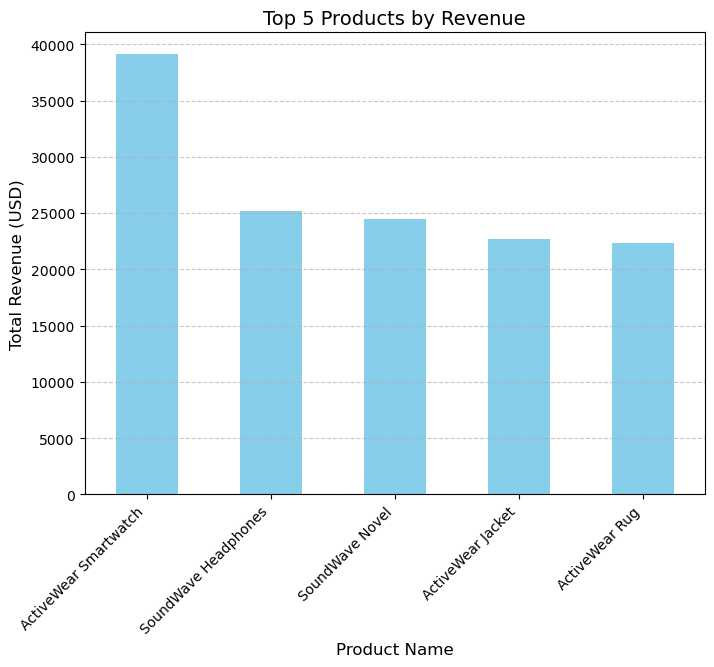

In [111]:
#Derive Business Insights
import matplotlib.pyplot as plt
#Insight 1.Top 5 Products: Identify the most-purchased products and their contribution to revenue.
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(top_products)
# Plot
plt.figure(figsize=(8, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


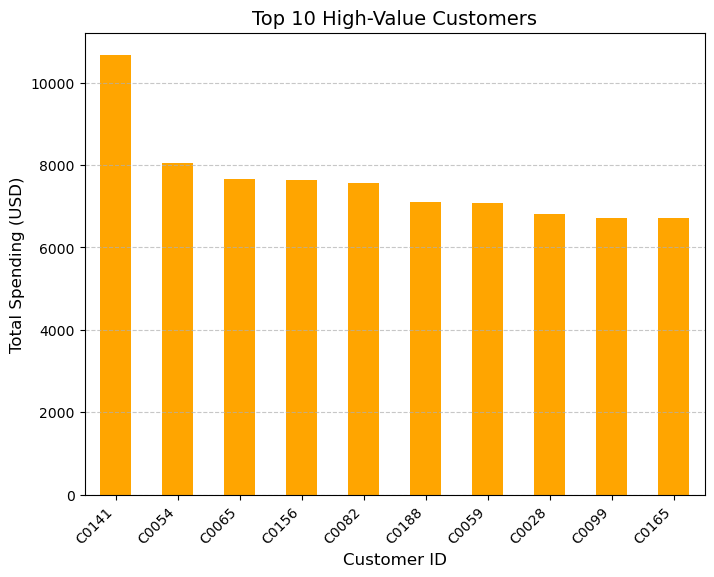

In [119]:
#Insight 2.Top 10 Customers: Find high-value customers based on total spending.
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)
# Plot
plt.figure(figsize=(8, 6))
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 High-Value Customers', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


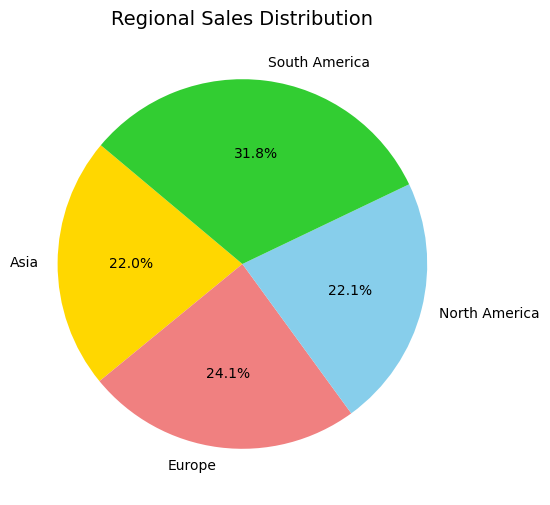

In [121]:
#Insight 3.Regional Trends: Analyze transactions by region.
regional_trends = merged_data.groupby('Region')['TotalValue'].sum()
print(regional_trends)
# Plot
plt.figure(figsize=(8, 6))
regional_trends.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'skyblue', 'limegreen'])
plt.title('Regional Sales Distribution', fontsize=14)
plt.ylabel('')  # Hide y-label for better aesthetics
plt.show()


TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


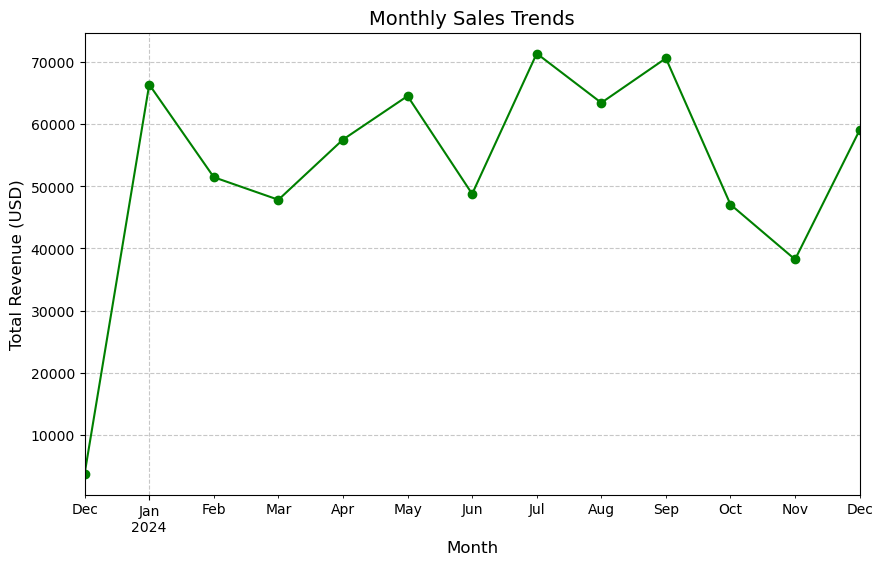

In [123]:
#Insight 4.Time-Based Analysis: Explore seasonal or monthly trends.
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_trends = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print(monthly_trends)
# Plot
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


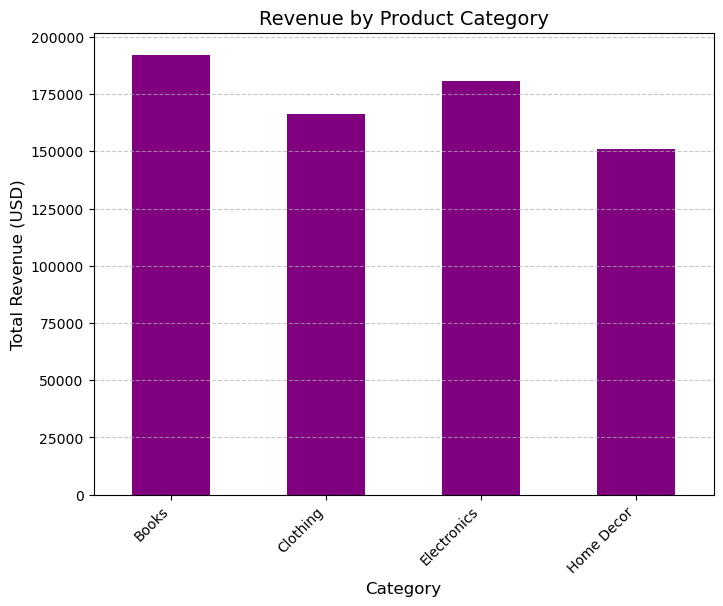

In [125]:
#Insight 5. Category Insights: Evaluate revenue contributions by product category.
category_revenue = merged_data.groupby('Category')['TotalValue'].sum()
print(category_revenue)
# Plot
plt.figure(figsize=(8, 6))
category_revenue.plot(kind='bar', color='purple')
plt.title('Revenue by Product Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Hour
16    38455.39
14    38323.60
22    35954.94
9     33595.06
4     33147.60
17    33030.25
19    32346.61
3     31643.94
23    30764.07
21    30686.67
18    29710.35
7     27446.64
11    27317.78
10    26511.34
20    26132.75
12    25761.01
15    25388.92
0     24981.18
2     24643.42
6     24620.36
1     23590.89
5     22871.70
13    21943.91
8     21127.18
Name: TotalValue, dtype: float64


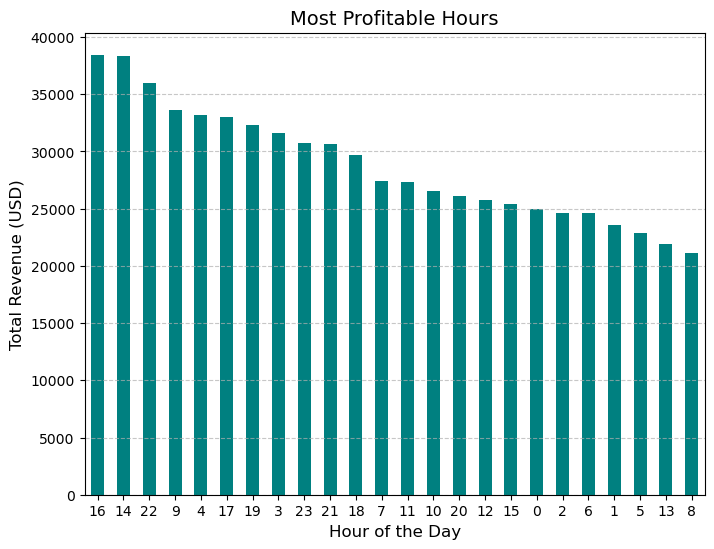

In [145]:
#Insight 6. Most Profitable Time of Day for Transactions
# Convert TransactionDate to datetime 
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Extract the hour from the transaction time
merged_data['Hour'] = merged_data['TransactionDate'].dt.hour

# Group by hour and calculate total revenue
hourly_revenue = merged_data.groupby('Hour')['TotalValue'].sum().sort_values(ascending=False)
print(hourly_revenue)
# Plot
plt.figure(figsize=(8, 6))
hourly_revenue.plot(kind='bar', color='teal')
plt.title('Most Profitable Hours', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

CustomerType
One-Time      6340.97
Repeat      683654.59
Name: TotalValue, dtype: float64


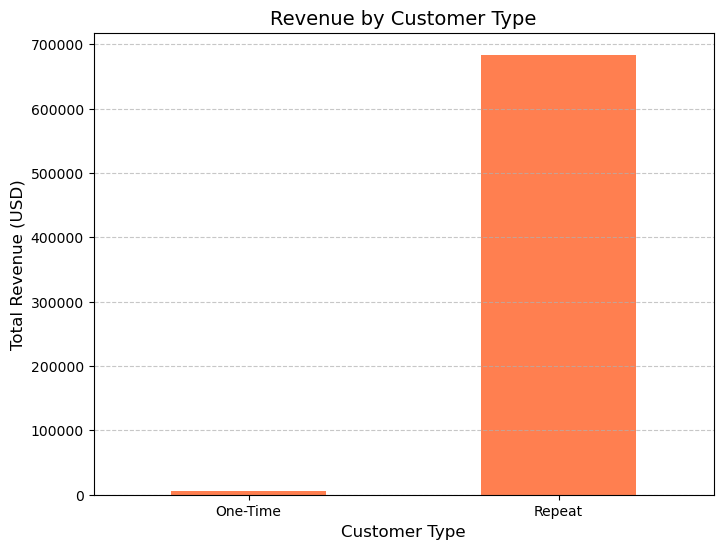

In [129]:
#Insight 7.Frequency of Repeat Customers.
# Calculate the number of transactions per customer
customer_transaction_count = merged_data.groupby('CustomerID')['TransactionID'].count()

# Categorize customers based on transaction frequency
merged_data['CustomerType'] = merged_data['CustomerID'].map(lambda x: 'Repeat' if customer_transaction_count[x] > 1 else 'One-Time')

# Analyze revenue contribution by customer type
customer_type_revenue = merged_data.groupby('CustomerType')['TotalValue'].sum()
print(customer_type_revenue)
# Plot
plt.figure(figsize=(8, 6))
customer_type_revenue.plot(kind='bar', color='coral')
plt.title('Revenue by Customer Type', fontsize=14)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [160]:
# Export cleaned datasets or EDA results as CSV files:
Merged_data = merged_data.to_csv('Merged_Data.csv', index=False)
print("Merged_Data.csv has been successfully saved!")

Merged_Data.csv has been successfully saved!


In [162]:
from IPython.display import FileLink

# Create a link to download the CSV file
FileLink(r'Merged_Data.csv')

/home/45451e42-4545-4efb-b786-f3e355082fdb/Merged_Data.csv